# Exploratory Data Analysis on Terrorism Project: 

### By Anuroop Arya

## Problem Statement 
As a security/defense analyst, try to find out the hot zone of terrorism.
You can choose any of the tool of your choice  
(Python/R/Tableau/PowerBI/Excel/SAP/SAS)

Dataset: https://bit.ly/2TK5Xn5

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")


In [2]:
# Load the dataset
df = pd.read_csv("globalterrorism.csv", encoding='latin1')


In [3]:
# Renaming columns for better readability
df.rename(columns={'iyear': 'Year', 'imonth': 'Month', 'iday': 'Day', 'gname': 'Group', 'country_txt': 'Country',
                   'region_txt': 'Region', 'provstate': 'State', 'city': 'City', 'latitude': 'Latitude',
                   'longitude': 'Longitude', 'summary': 'Summary', 'attacktype1_txt': 'AttackType',
                   'targtype1_txt': 'TargetType', 'weaptype1_txt': 'Weapon', 'nkill': 'Killed',
                   'nwound': 'Wounded'}, inplace=True)

In [4]:
# Selecting relevant columns
df = df[['Year', 'Month', 'Day', 'Country', 'State', 'Region', 'City', 'Latitude', 'Longitude', 'AttackType',
         'Killed', 'Wounded', 'TargetType', 'Weapon', 'Group']]


In [5]:
# Handling missing values
df['Wounded'] = df['Wounded'].fillna(0)
df['Killed'] = df['Killed'].fillna(0)
df['Casualties'] = df['Killed'] + df['Wounded']


In [6]:
# Data Exploration and Visualization
# Describing the dataset
df.describe()


,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualties
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


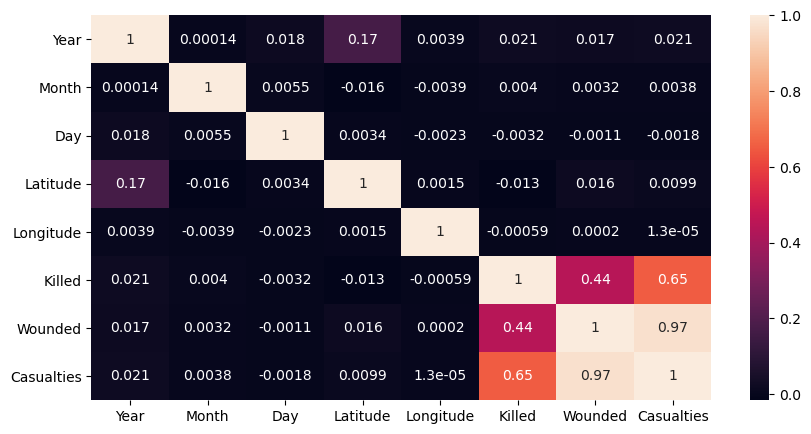

In [7]:
# Correlation and Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(), annot=True)
plt.show()

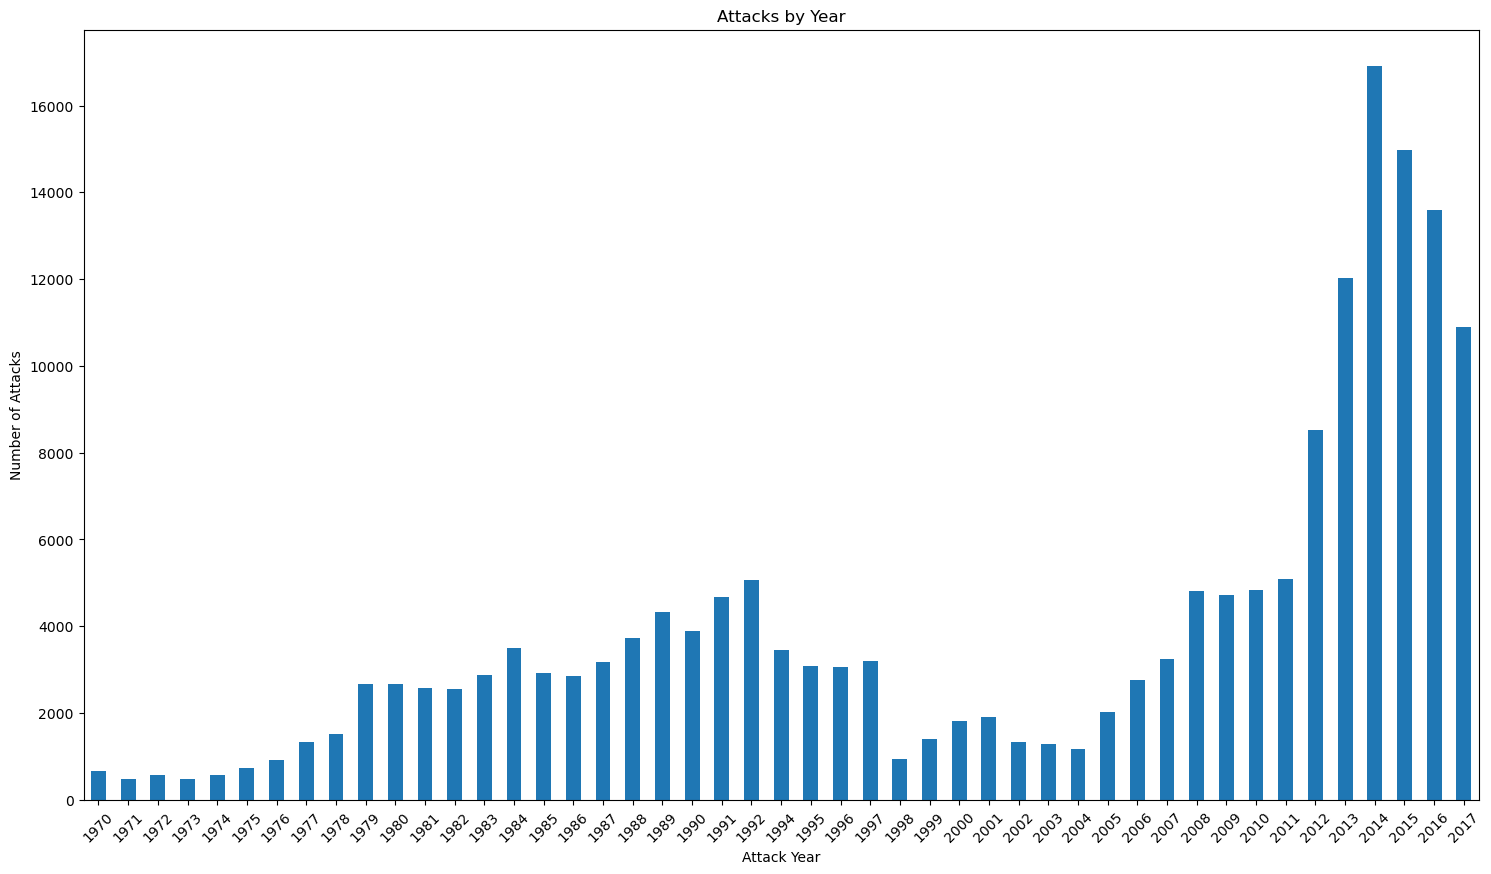

In [8]:
# Analysis based on Year
df['Year'].value_counts(dropna=False).sort_index().plot(kind='bar', figsize=(18, 10))
plt.xticks(rotation=45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks')
plt.title('Attacks by Year')
plt.show()


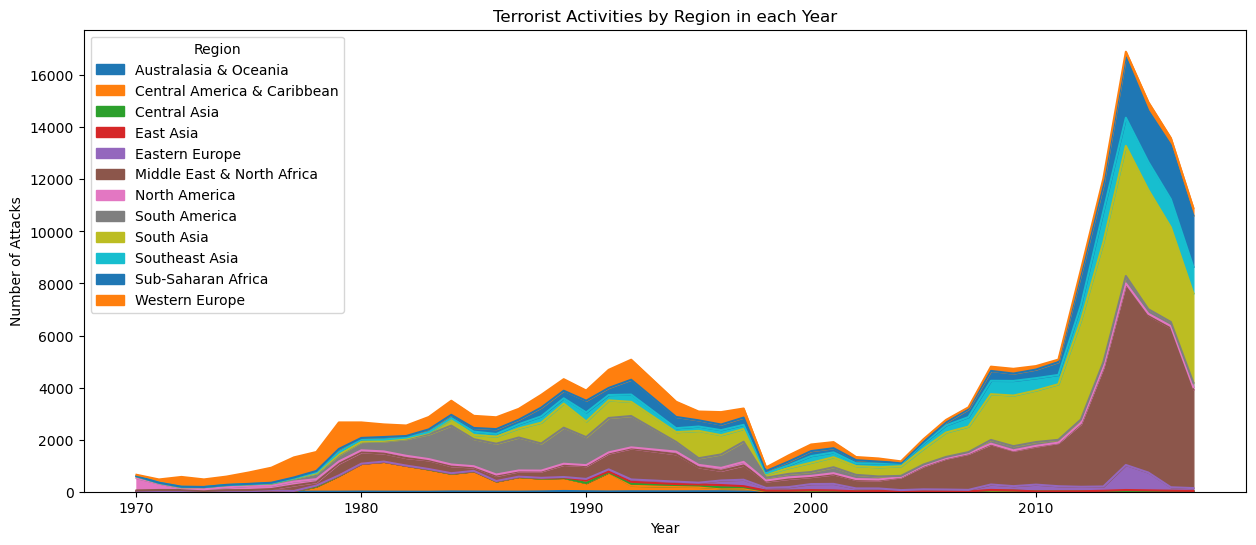

In [9]:
# Analysis based on Region
pd.crosstab(df.Year, df.Region).plot(kind='area', figsize=(15, 6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

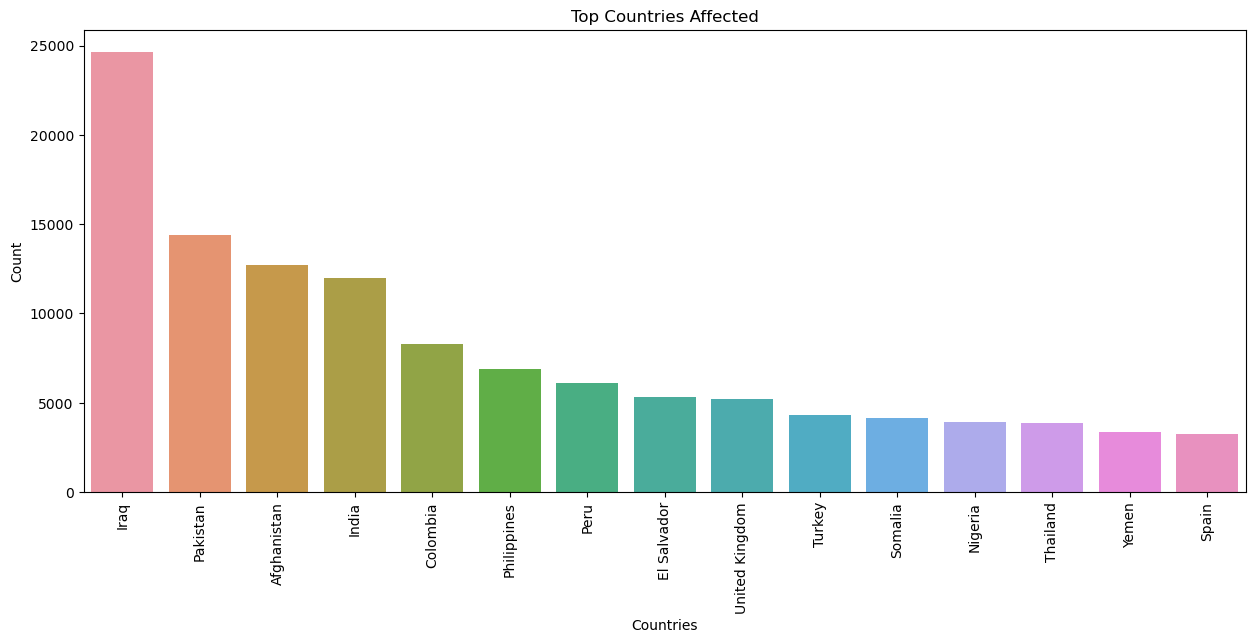

In [10]:
# Top Countries Affected
plt.figure(figsize=(15, 6))
sns.barplot(x=df['Country'].value_counts()[:15].index, y=df['Country'].value_counts()[:15].values)
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

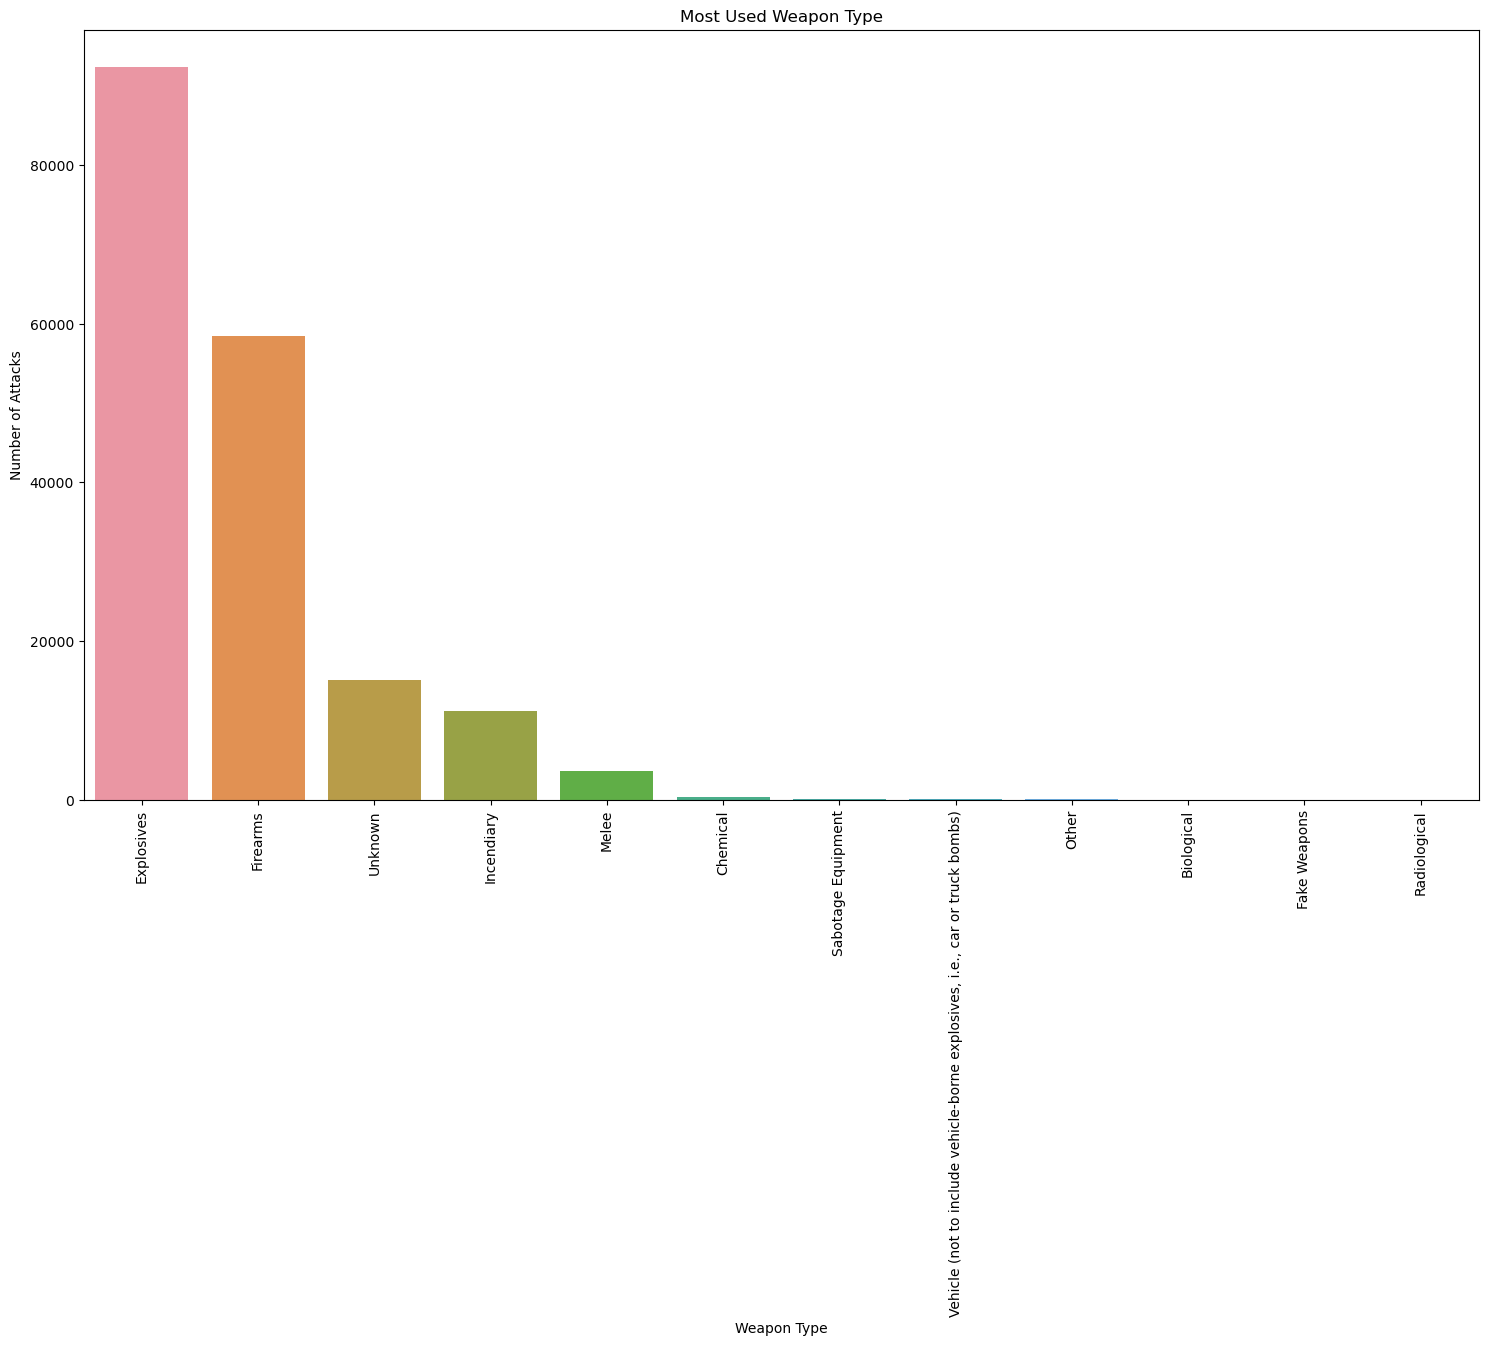

In [11]:
# Most Used Weapon Type
weapon_data = df['Weapon'].value_counts()
plt.figure(figsize=(18, 10))
sns.barplot(x=weapon_data.index, y=weapon_data.values)
plt.title('Most Used Weapon Type')
plt.xlabel('Weapon Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90)
plt.show()


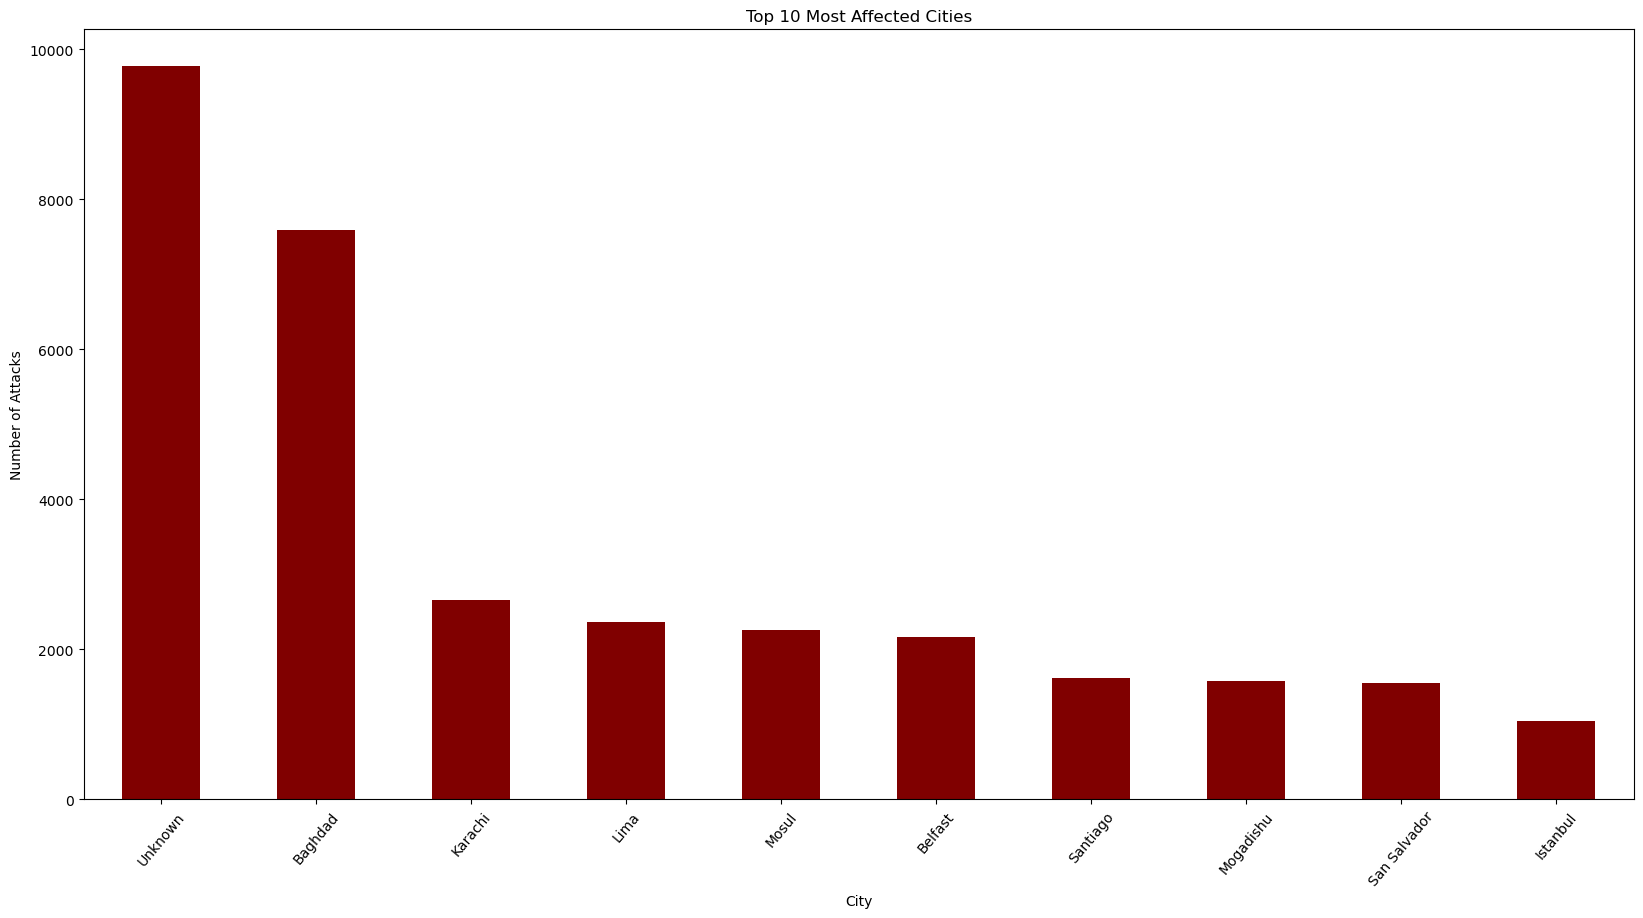

In [12]:
# Top 10 Most Affected Cities
df['City'].value_counts().head(10).plot(kind='bar', figsize=(20, 10), color=['maroon'])
plt.xticks(rotation=50)
plt.xlabel("City")
plt.ylabel("Number of Attacks")
plt.title("Top 10 Most Affected Cities")
plt.show()

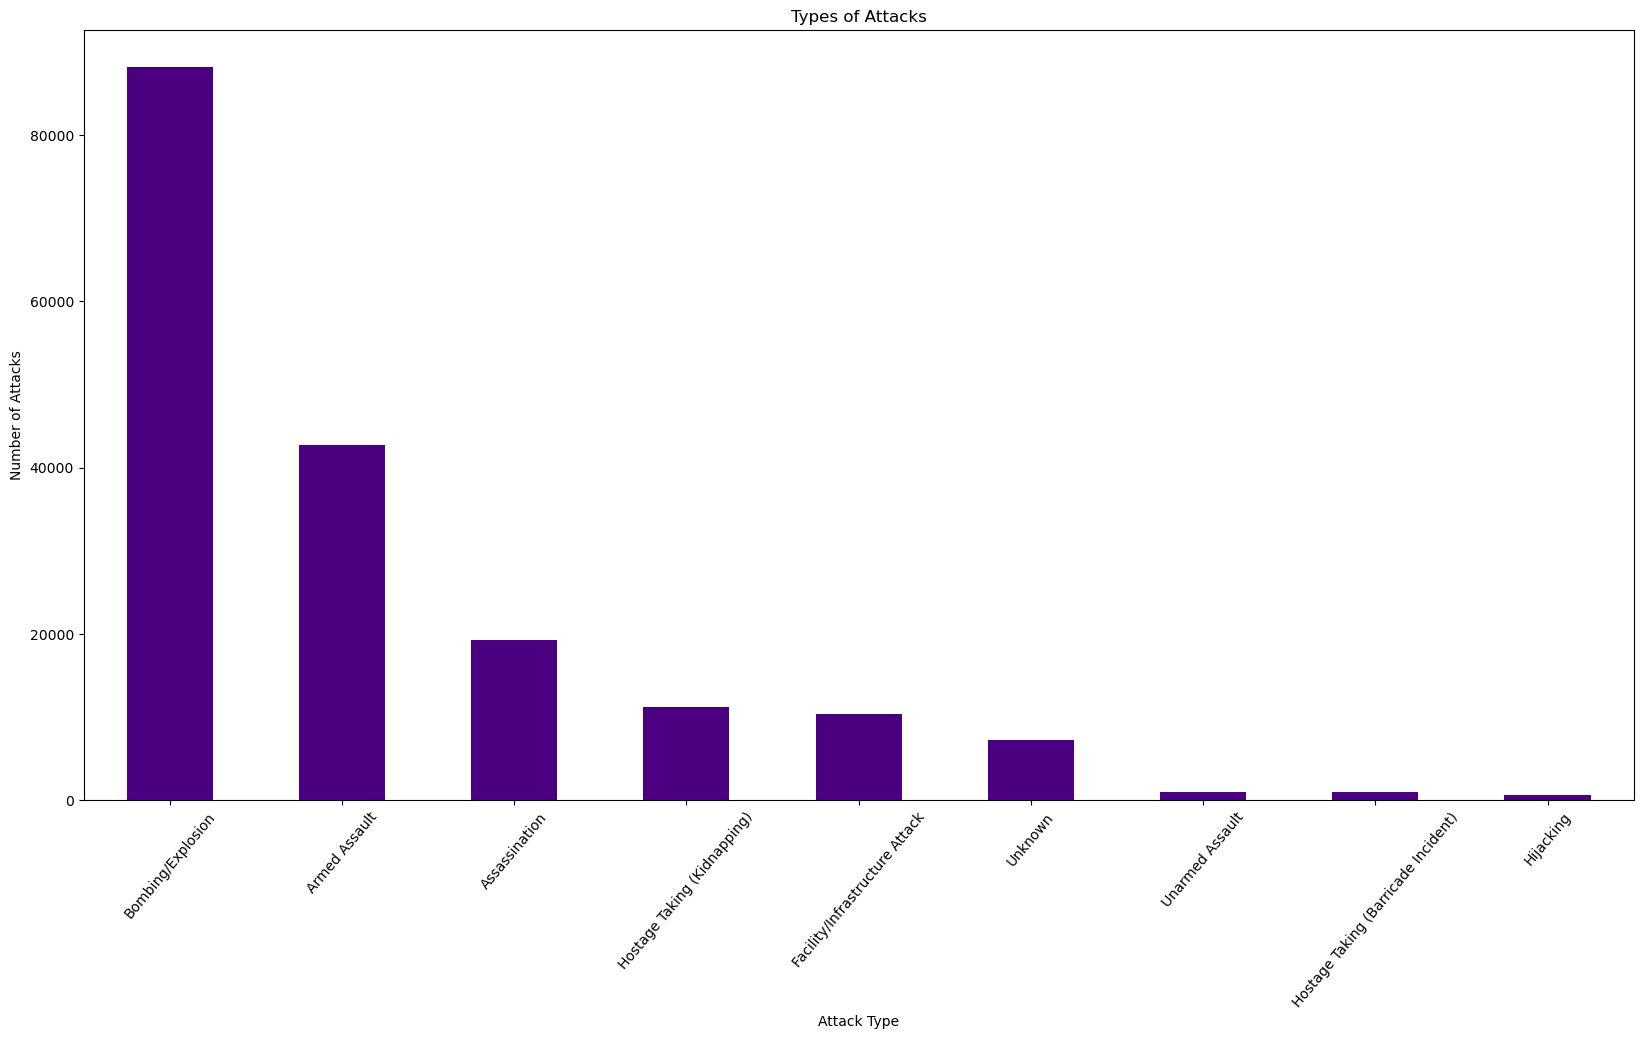

In [13]:
# Analysis based on Attack Type
df['AttackType'].value_counts().plot(kind='bar', figsize=(20, 10), color='indigo')
plt.xticks(rotation=50)
plt.xlabel("Attack Type")
plt.ylabel("Number of Attacks")
plt.title("Types of Attacks")
plt.show()


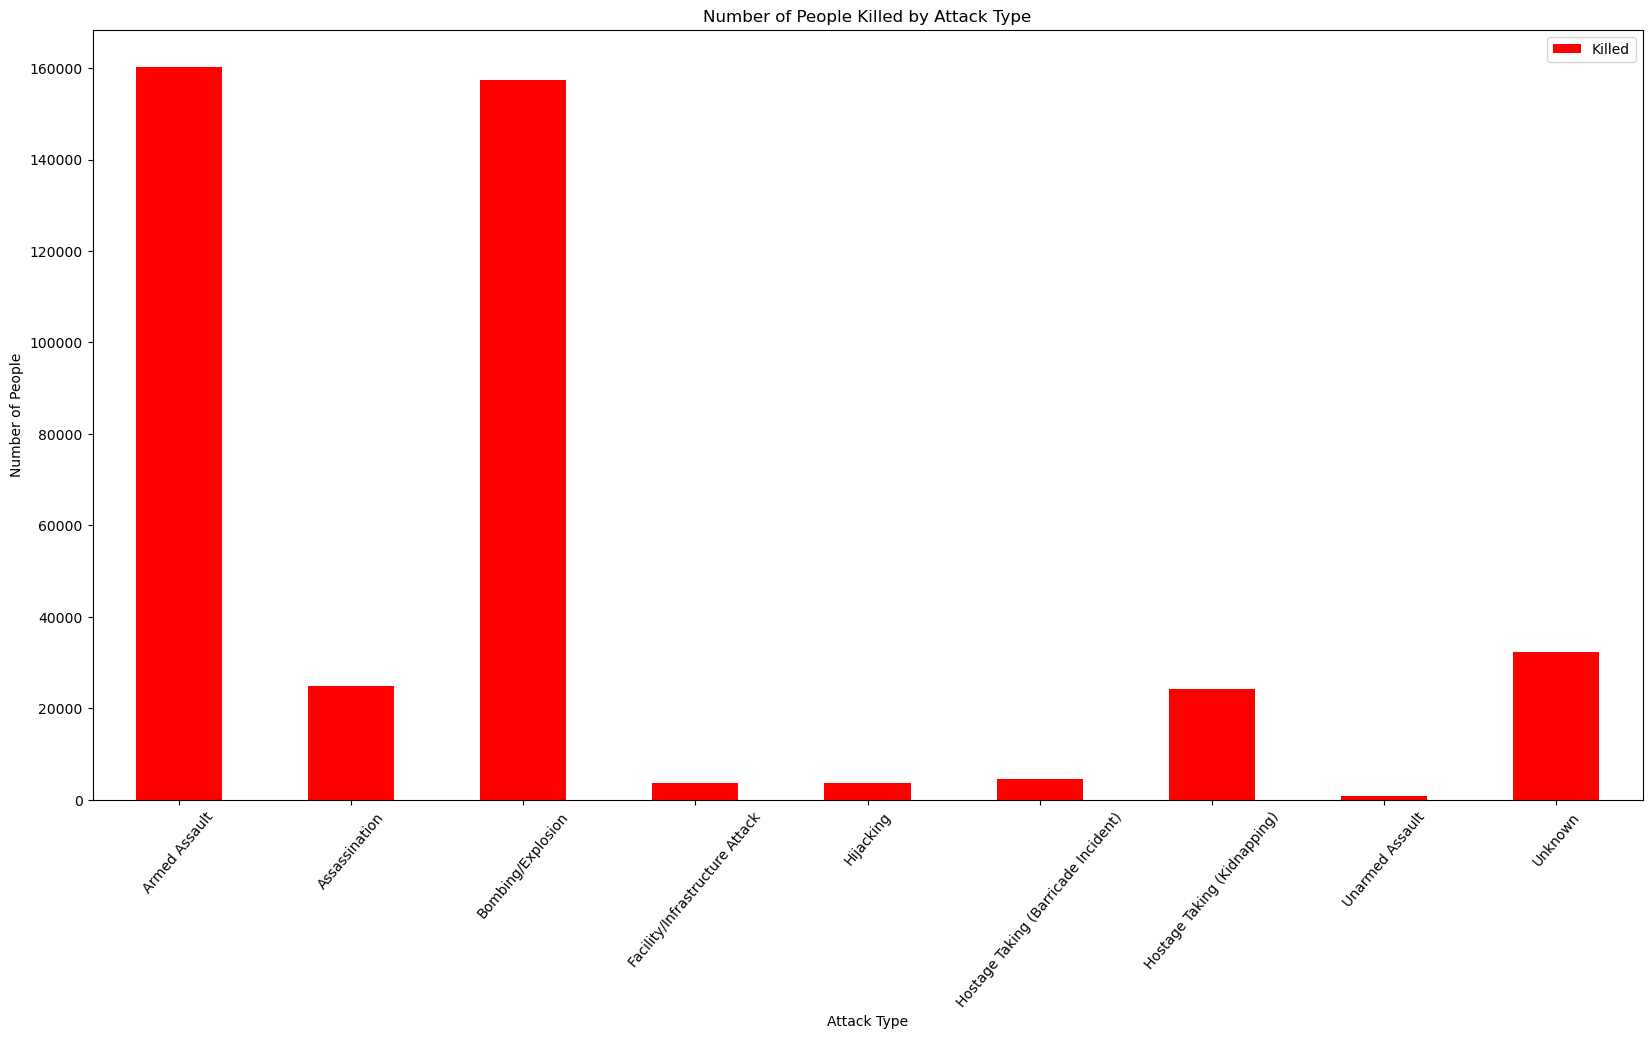

In [14]:
# Number of people killed by each Attack Type
df[['AttackType', 'Killed']].groupby(["AttackType"]).sum().plot(kind='bar', figsize=(20, 10), color=['red'])
plt.xticks(rotation=50)
plt.title("Number of People Killed by Attack Type")
plt.ylabel('Number of People')
plt.xlabel('Attack Type')
plt.show()

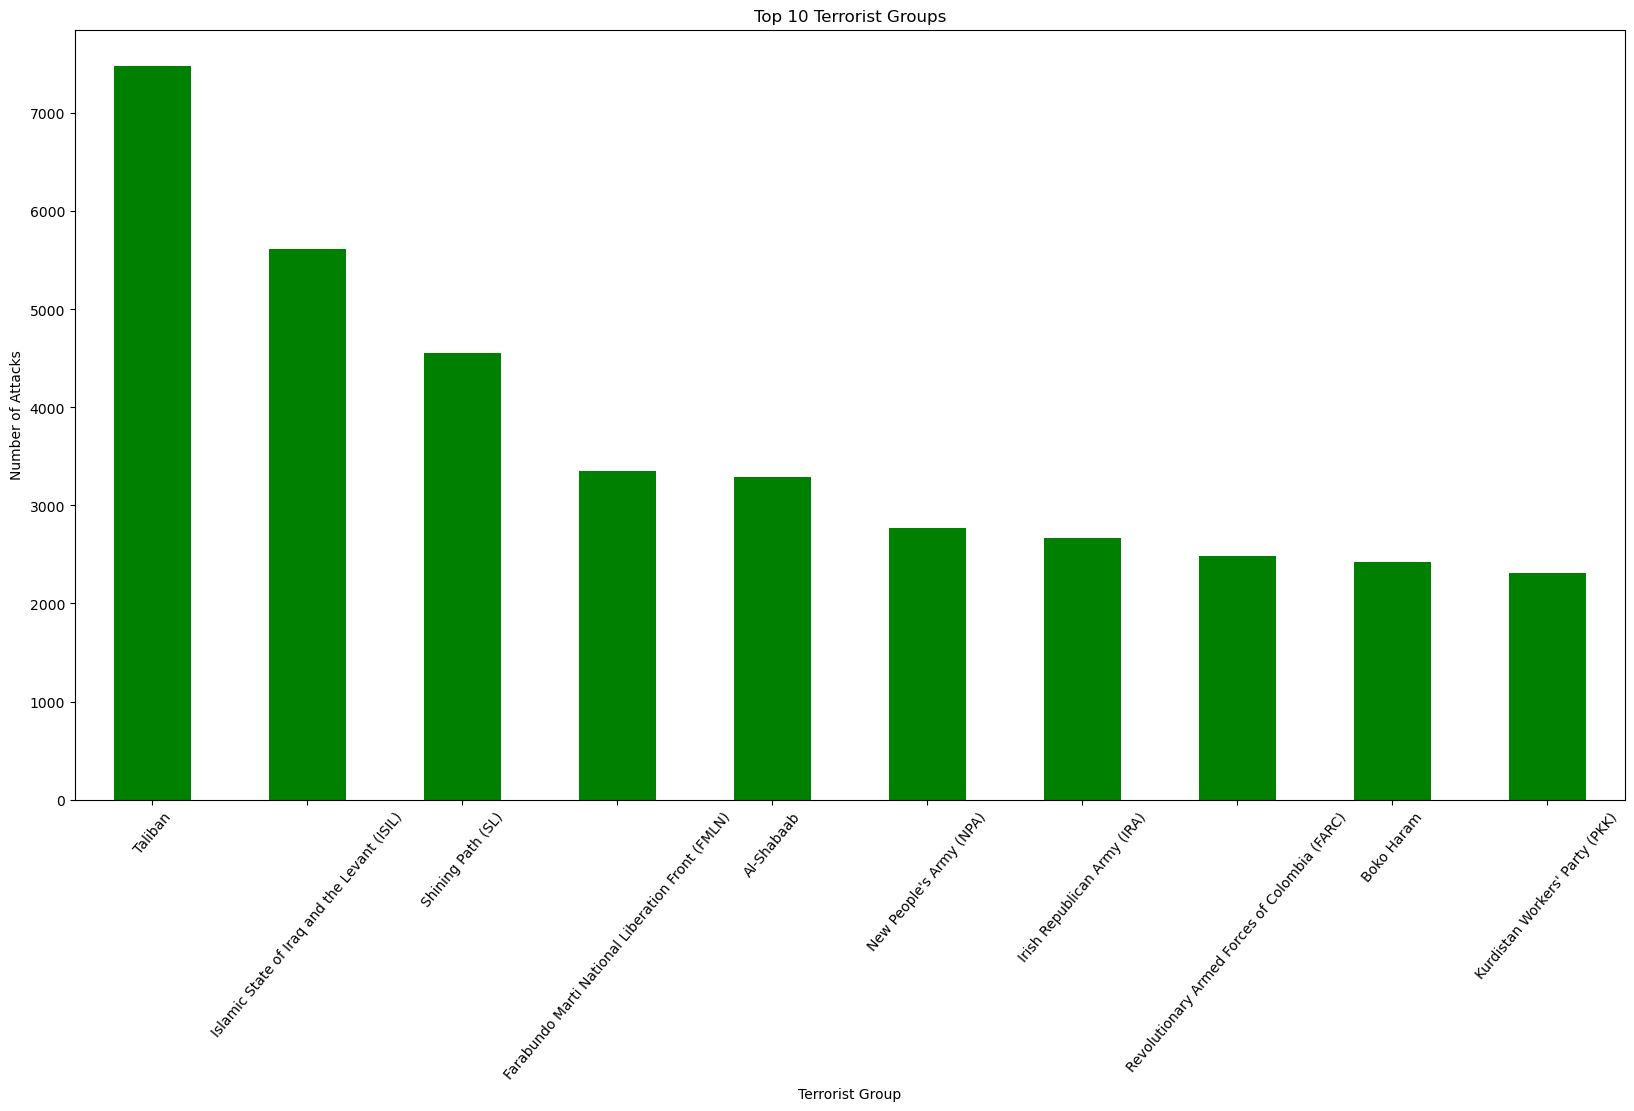

In [15]:
# Top 10 Terrorist Groups
df['Group'].value_counts().drop('Unknown').head(10).plot(kind='bar', color='green', figsize=(20, 10))
plt.title("Top 10 Terrorist Groups")
plt.xlabel("Terrorist Group")
plt.xticks(rotation=50)
plt.ylabel("Number of Attacks")
plt.show()

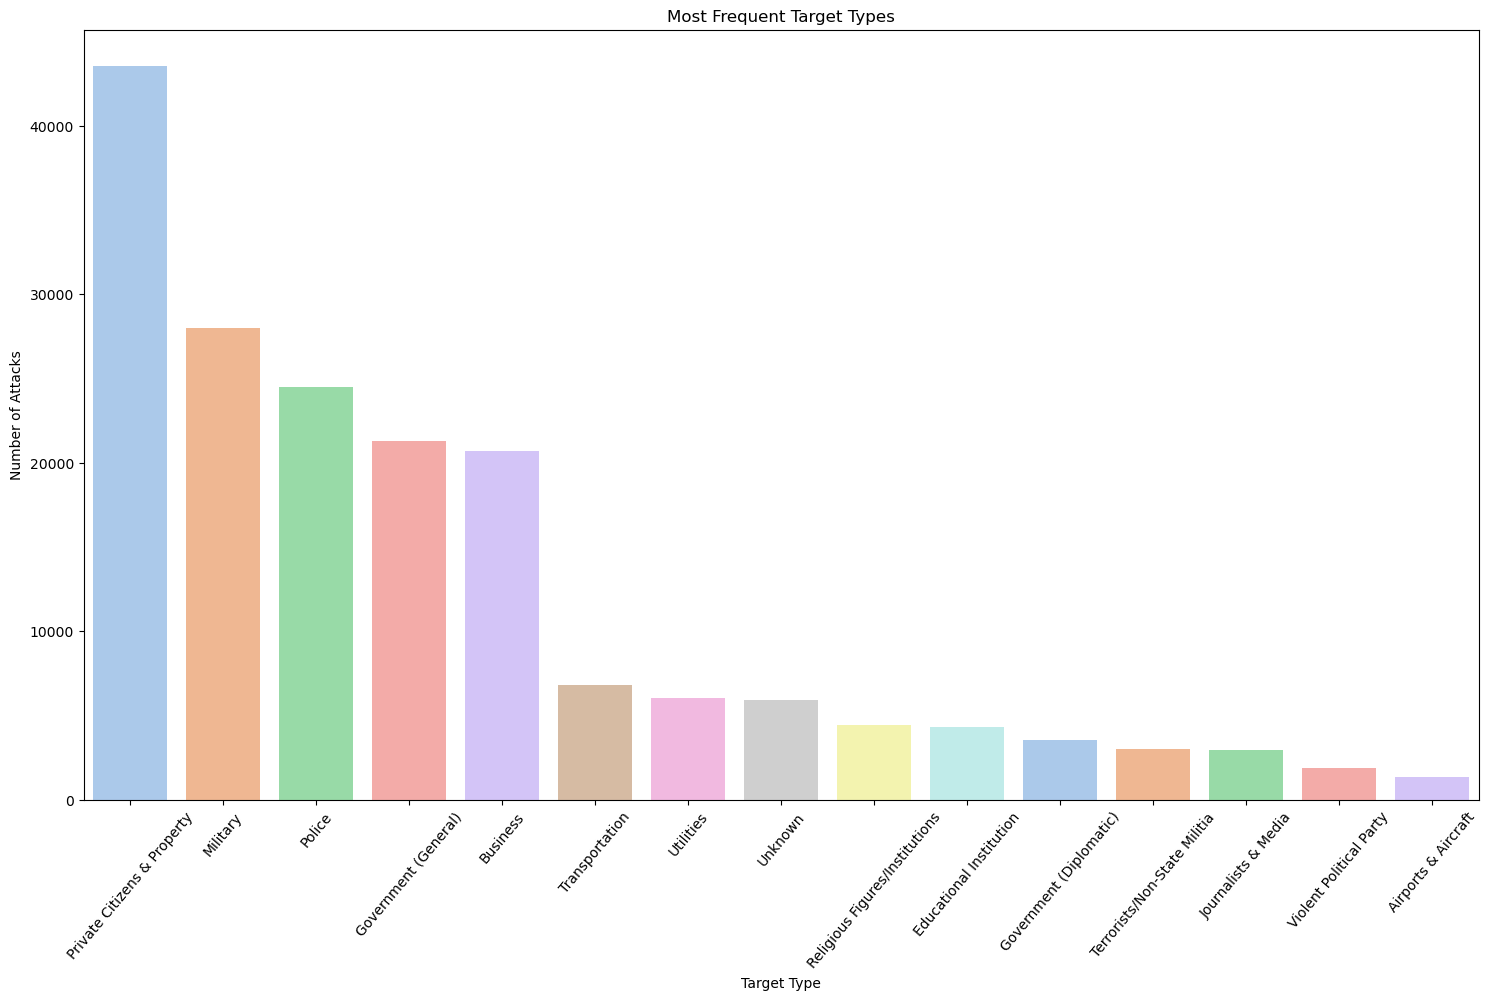

In [16]:

# Most Frequent Target Types
target_data = df['TargetType'].value_counts().nlargest(n=15)
plt.figure(figsize=(18, 10))
sns.barplot(x=target_data.index, y=target_data.values, palette='pastel')
plt.title('Most Frequent Target Types')
plt.xlabel('Target Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=50)
plt.show()

In [17]:
# Total number of people killed by terrorist attacks
total_killed = int(df['Killed'].sum())
print('Total number of people killed by terrorist attacks:', total_killed)


Total number of people killed by terrorist attacks: 411868


In [18]:
# Group-wise number of people killed by terrorist attacks in each country
group_kills = df.groupby(['Group', 'Country'])['Killed'].sum().sort_values(ascending=False).reset_index().head(10)
print(group_kills)


                                              Group      Country   Killed
0                                           Unknown         Iraq  38560.0
1       Islamic State of Iraq and the Levant (ISIL)         Iraq  31058.0
2                                           Taliban  Afghanistan  29269.0
3                                        Boko Haram      Nigeria  16917.0
4                                           Unknown     Pakistan  12023.0
5                                 Shining Path (SL)         Peru  11595.0
6           Liberation Tigers of Tamil Eelam (LTTE)    Sri Lanka  10928.0
7                                        Al-Shabaab      Somalia   8176.0
8  Farabundo Marti National Liberation Front (FMLN)  El Salvador   8019.0
9                                           Unknown  Afghanistan   7398.0
